In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import collections

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combined_data.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
get_num_mice = combined_data['Mouse ID'].value_counts()
num_mice = len(get_num_mice)
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data = combined_data.astype({"Timepoint": str}, errors='raise')

duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice['Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
get_num_mice2 = combined_data['Mouse ID'].value_counts()
num_mice2 = len(get_num_mice2)
num_mice2

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tvr_group = combined_data.groupby('Drug Regimen')

tvr_mean = tvr_group['Tumor Volume (mm3)'].mean()
tvr_median = tvr_group['Tumor Volume (mm3)'].median()
tvr_var = tvr_group['Tumor Volume (mm3)'].var()
tvr_std = tvr_group['Tumor Volume (mm3)'].std()
tvr_sem = tvr_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tvr_df = pd.DataFrame({"Mean Tumor Volume": tvr_mean,
                       "Median Tumor Volume": tvr_median,
                       "Tumor Volume Variance": tvr_var,
                       "Tumor Volume Std. Dev.": tvr_std,
                       "Tumor Volume Std. Err.": tvr_sem
                      })
tvr_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

<IPython.core.display.Javascript object>


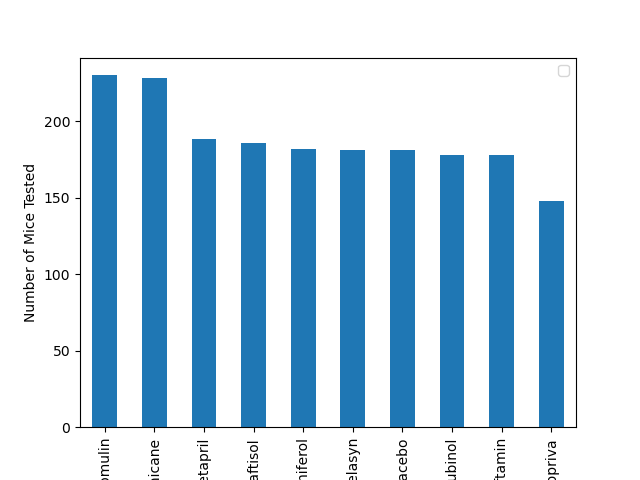

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Panda.
%matplotlib notebook
import matplotlib.pyplot as plt

DataFrame = combined_data
values = combined_data['Drug Regimen'].value_counts()

df = pd.DataFrame({'Drug Regimen':['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 
           'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], 
                   'Number of Mice Tested':values})

df.plot.bar(x='Drug Regimen', y='Number of Mice Tested', rot='vertical')
plt.legend([])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

<IPython.core.display.Javascript object>


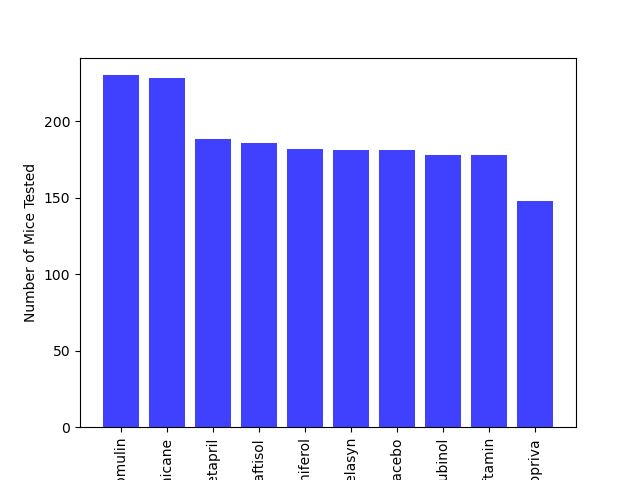

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib notebook
import matplotlib.pyplot as plt

x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y_axis = combined_data['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis, color='b', alpha=.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(np.arange(10), ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 
           'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], rotation='vertical')  # Set text labels.

plt.show()

<IPython.core.display.Javascript object>


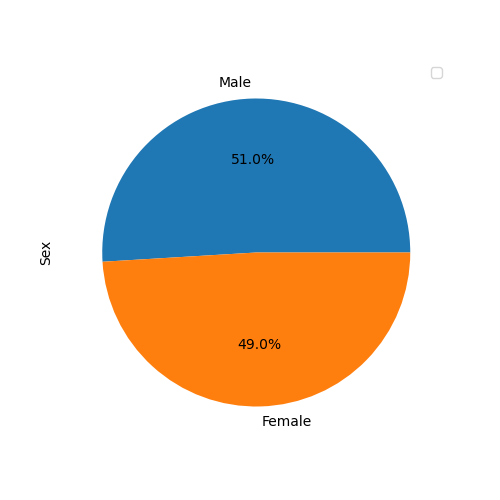

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sm_df = pd.DataFrame({'Sex': [958, 922]},
                  index=['Male', 'Female'])
sm_plot = sm_df.plot.pie(y='Sex', figsize=(5, 5), autopct="%1.1f%%")
plt.legend([])

<IPython.core.display.Javascript object>


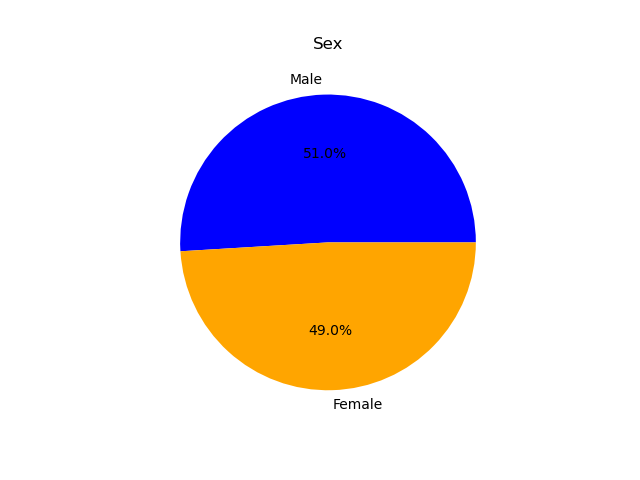

Text(0.5, 1.0, 'Sex')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# Find and set values for each section of the pie chart
sex_mice = combined_data['Sex'].value_counts()
sex_mice
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.title('Sex')

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tvr_max_df = DataFrame.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df2 = pd.merge(tvr_max_df, DataFrame, on=['Mouse ID', 'Timepoint'])
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,5,48.508468,0,Infubinol,Female,20,23
1,a251,5,46.982127,0,Infubinol,Female,21,25
2,a262,5,48.717568,1,Placebo,Female,17,29
3,a275,5,46.795257,0,Ceftamin,Female,20,28
4,a366,5,48.951368,0,Stelasyn,Female,16,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in range(len(treatments)):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = df2.loc[df2['Drug Regimen'] == treatments[t], ['Tumor Volume (mm3)']]
    
    # add subset
    tumor_vol_data.append(tumor_vol['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data[t].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    output = tumor_vol_data[t].loc[(tumor_vol_data[t] < lower_bound) | (tumor_vol_data[t] > upper_bound)]
    print(f"{treatments[t]}'s potential outliers: {output}")

Capomulin's potential outliers: 61     38.796474
208    39.202129
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 10     38.723707
96     38.825898
177    38.711872
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


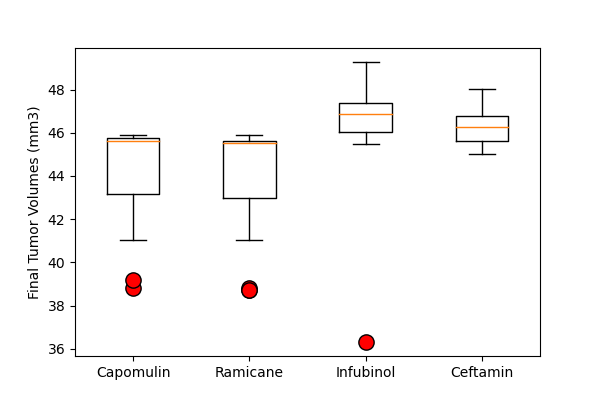

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 4))
pos = np.arange(len(tumor_vol_data)) + 1
tvr_bp = plt.boxplot(tumor_vol_data, positions=pos, labels=treatments)

plt.setp(tvr_bp['fliers'], markerfacecolor='red', markersize=11)
plt.ylabel('Final Tumor Volumes (mm3)')
plt.show()

<IPython.core.display.Javascript object>


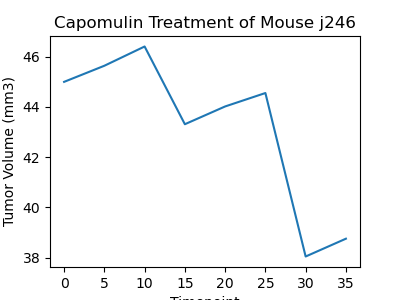

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Get all mice treated with Capomulin
cpn_mice = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', :]
sample = cpn_mice['Mouse ID'].unique()

# Pick a random mouse from the above list
get_rand_mice = np.random.choice(sample)
rand_mice = combined_data.loc[combined_data['Mouse ID'] == get_rand_mice, :]

# Plot results for tumor volume vs time points for random mouse
plt.figure(figsize=(4, 3))
plt.plot(rand_mice['Timepoint'], rand_mice['Tumor Volume (mm3)'])

# Add labels to graph
plt.title(rand_mice.iloc[0, 4] + ' Treatment of Mouse ' + rand_mice.iloc[0, 0])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


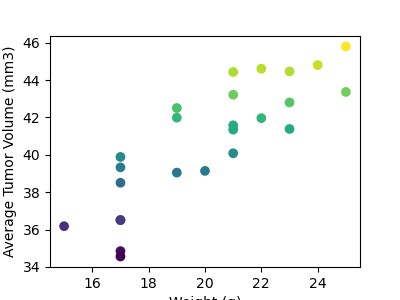

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe grouped by mouse with tumor volume averages
cpn_group = cpn_mice.groupby('Mouse ID')
cpn = cpn_group.mean()

# Graph scatterplot of weight vs ave. tumor volume (and make it pretty colors)
plt.figure(figsize=(4, 3))
plt.scatter(cpn['Weight (g)'], cpn['Tumor Volume (mm3)'], c=cpn['Tumor Volume (mm3)'])

# Add labels to graph
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


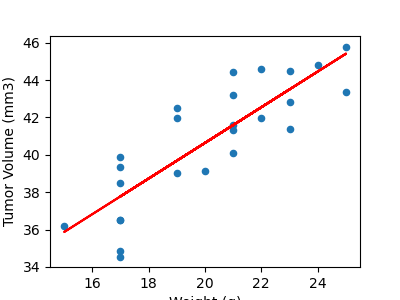

The correlation between mouse weight and the average tumor volume is 0.84


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Redo above graph using Pandas
cpn.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', figsize=(4, 3))

# Calculate linear regression info
slope, intercept, rvalue, pvalue, stderr = st.linregress(cpn['Weight (g)'], cpn['Tumor Volume (mm3)'])
regress = cpn['Weight (g)'] * slope + intercept

# Plot regression line
regress_line, = plt.plot(cpn['Weight (g)'], regress, color='red')

# Calculate and display correlation info
correlation = st.pearsonr(cpn['Weight (g)'], cpn['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")